<a id="primero"></a>
## 1. Tipos de fronteras en clasificación

Como se ha discutido en clases, los problemas de clasificación pueden ser representados de distintas maneras, en donde estas representaciones definen un espacio de entrada del dominio de los datos ($\mathbb{R}_{\mathbb{X}}$). Los ejemplos dentro del espacio de entrada (*manifold*) pueden tener distintas formas, donde estas indicarán si es que estos ejemplos tendrán fronteras lineales o no. Con el propósito de analizar los distintos tipos de fronteras que definen los algoritmos de clasificación, se trabajará con un dataset sintético lo cual es ideal para analizar los diferentes tipos, así hacer un recorrido rápido por las grandes ideas en la búsqueda dela no-linealidad.

In [23]:
#mysticplot

Este dataset de jugete está en un espacio de 2 dimensiones y es conformado por dos conjuntos de datos, pudiendo ver que la frontera entre ellos claramente no es lineal. El dataset representa al problema XOR, pero para trabajarlo de una manera distinta se generán gausianas para agregar un poco de ruido en el conjunto de entrenamiento y que no sea un problema trivial. El código que los genera es el siguiente:

In [24]:
import numpy as np
def do_gaussianXOR(n1=250,n2=250):
    rng = np.random.RandomState(0)
    u = 0.5
    std = 0.3 #el ruido se agrega aca
    primer_c = rng.normal(loc=[u,u],scale=std,size=(n1,2))
    segundo_c = rng.normal(loc=[-u,u],scale=std,size=(n2,2))
    tercer_c = rng.normal(loc=[-u,-u],scale=std,size=(n1,2))
    cuarto_c = rng.normal(loc=[u,-u],scale=std,size=(n2,2))
    X_train = np.vstack((primer_c,segundo_c,tercer_c,cuarto_c))
    Y_train = np.hstack((np.zeros(n1),np.ones(n2),np.zeros(n1),np.ones(n2)))   
    X_test = rng.uniform(low=-1.0,high=1.0,size=( (n1+n2),2))
    Y_test = np.logical_xor(X_test[:,0] > 0, X_test[:,1] > 0)
    return X_train,Y_train,X_test,Y_test

>a) Construya el conjunto de datos (dataset) y describa el proceso de creación de éstos. Determine cuántos registros contiene cada conjunto y visualı́celos.

(1000, 2)


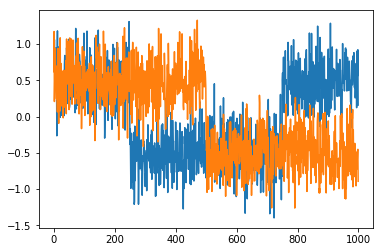

(1000,)


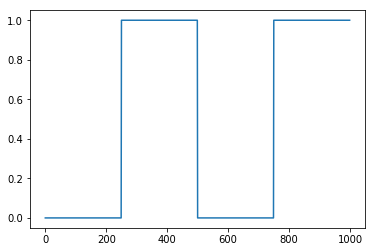

*****TEST*****
(500, 2)


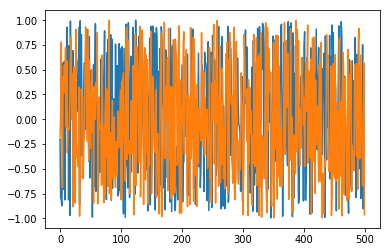

(500,)


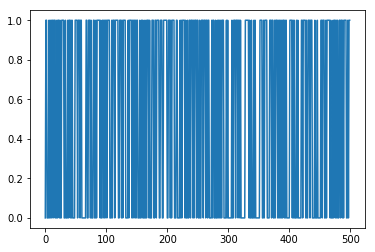

In [25]:
X_train,Y_train,X_test,Y_test = do_gaussianXOR()
import matplotlib.pyplot as plt

print X_train.shape
plt.plot(X_train)
plt.show()

print Y_train.shape
plt.plot(Y_train)
plt.show()

print "*****TEST*****"

print X_test.shape
plt.plot(X_test)
plt.show()

print Y_test.shape
plt.plot(Y_test)
plt.show()

El primer gráfico muestra como se van moviendo los datos de la muestra de entrenamiento.
¿que se ve?: el input tiene dos variables a partir de las cuales se produce una clasificación binaria Datos: Los datos de entrenamiento tienen 1000 datos. Los datos de prueba tienen 500. Observación: claramente es XOR ya que cuando son distintos entonces es 1. Los valores de X_train.(,0) son azules Los valores de X_train.(,1) son naranjas.

Para visualizar las fronteras de los distintos algoritmos utilice el siguiente código:

In [26]:
import matplotlib.pyplot as plt
def visualize_border(model,x,y,title=""):
    fig, axis = plt.subplots(1, 1,figsize=(7, 7))
    h = .01 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5 #definimos bordes laterales
    y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5 #definimos bordes verticales
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    #se grafican los puntos pintandolos según su valor real "y"
    axis.scatter(x[:,0],x[:,1],s=20,c=y,zorder=10,cmap=plt.cm.bwr)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #or predict_proba
    Z = Z.reshape(xx.shape)
    Zplot = Z > 0.5
    
    #se pinta el background según la predicción
    axis.pcolormesh(xx, yy, Zplot ,cmap=plt.cm.bone)
    plt.title(title)
    plt.show()

plt.scatter(x[:,0], x[:,1], s=50, c=y,map=plt.cm.winter)
con esta forma de plotear decimos lo siguiente:
     
     Los valores de x.(0) se distribuyen en valores entre -1 y 1
     Los valores de x.(1) se distribuyen en valores entre -1 y 1
     entonces:
         si dividimos en nuestra imaginación el plano en 4 cuadrantes. 
         en el primer cuadrante hay X.(0) negativo y X.(1) positivo.. por lo tanto es 1  
         en el segundo cuadrante hay X.(0) positivo y X.(1) positivo.. por lo tanto es 0
         en el tercer cuadrante hay X.(0) negativo y X.(1) negativo.. por lo tanto es 0
         en el cuarto cuadrante hay X.(0) positivo y X.(1) negativo.. por lo tanto es 1
         de lo anterior se concluye que si el dato está en el cuadrante 1 o 4 => es 1
         si el dato está en el cuadrante 2 o 3 => 0  

>b) Entrene el clasificador Linear Discriminant Analysis (LDA) y visualice la frontera de decisión que define este algoritmo. Comente cualitativamente lo que observa.

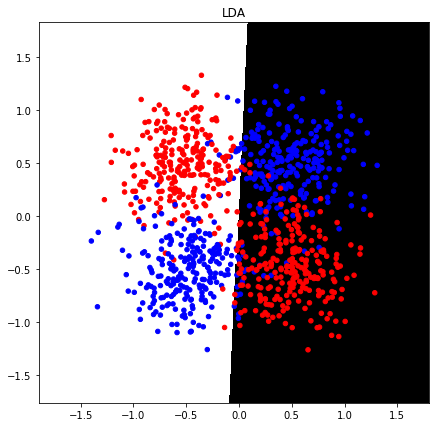

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA()
model.fit(X_train,Y_train)

#el modelo ya está entrenado. Ahora vamos a visualizar los resultados de las predicciones del modelo
visualize_border(model,X_train,Y_train,"LDA")

En este gráfico podemos apreciar que este clasificador no va a lograr separar satisfactoriamente los datos ya que es lineal y a simple vista se puede ver que con una linea no es suficiente.

>c) Entrene el clasificador Quadratic Discriminant Analysis (QDA) y visualice la frontera de decisión que define este algoritmo. Analice cualitativamente lo que observa y compare con LDA, en qué difieren y en qué se asemejan ¿Qué distribución de probabilidad asumen cada uno?

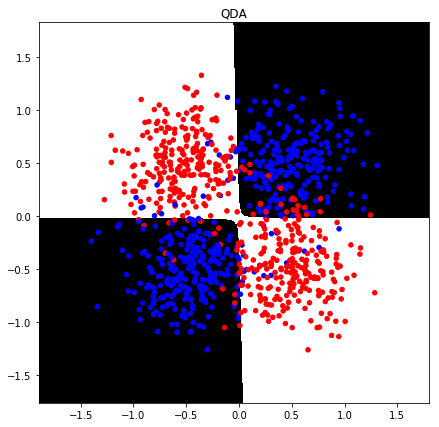

In [28]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model = QDA()
model.fit(X_train,Y_train)
visualize_border(model,X_train,Y_train,"QDA")


El análisis discriminante lineal (análisis discriminante analítico) y el análisis discriminante cuadrático (análisis discriminante analítico discriminatorio cuadrático) son dos clasificadores clásicos, con, como lo sugieren sus nombres, una superficie de decisión lineal y cuadrática, respectivamente.

Estos clasificadores son atractivos porque tienen soluciones de forma cerrada que pueden computarse fácilmente, son intrínsecamente multiclase, han demostrado que funcionan bien en la práctica y no tienen hiperparámetros que ajustar.

La gráfica muestra los límites de decisión para el análisis discriminante lineal y el análisis discriminante cuadrático. La fila inferior demuestra que el Análisis discriminante lineal solo puede aprender límites lineales, mientras que el Análisis discriminatorio cuadrático puede aprender límites cuadráticos y, por lo tanto, es más flexible y se puede ver que responde mejor a lo solicitado, incluso podria ser una solución viable dependiendo del error buscado, pero la idea es seguir mejorando con los modelos que se usaran a continuación.

Para lo que sigue de la actividad se trabajará con una widget interactiva [2] para sintonizar los parámetros de regularización o estructurales de los distintos algoritmos. Por ello cada vez que se modifique el parámetro en la ventana se entrenará el modelo y se visualizará la frontera en la misma imagen.

In [29]:
from ipywidgets import interactive
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X_train,Y_train) #here choose train/test or both!

>d) Demuestre experimentalmente que una Máquina de Vectores de Soporte (SVM) Lineal no puede resolver el problema, para esto construyala a través de sklearn. Mediante la widget interactiva explore diferentes valores del parámetro de regularización  𝐶 . Analice cualitativamente lo observado, para validar su análisis cualitativo calcule el accuracy sobre el conjunto de pruebas.

In [30]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    C = 10**(param)
    print("Param C= ",C)
    model.set_params(C=C,kernel='linear')
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model
p_min = -6 #define your range
p_max = 4 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0tMSwgZGVzY3JpcHRpb249dSdwYXJhbScsIG1heD00LCBtaW49LTYpLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz0odSd3aWTigKY=


Se puede ver que este modelo tiene el mismo problema que el LDA, ya que es lineal. 

Esto se puede respaldar con el mejor accuracy que se obtiene de 0.486 con un C de 0.1. Nosotros sabemos que si el accuracy de un modelo con una salida binaria es menor a 0.5 se puede descartar sin dudar, ya que podria obtenerse un mejor resultado usando azar.

>e) Demuestre experimentalmente que una Máquina de Vectores de Soporte (SVM) no Lineal puede resolver el problema, para ésto construya una SVM no Lineal a través de un kernel [3]. Mediante la widget interactiva explore diferentes valores del parámetro de regularización  𝐶  y con diferentes kernels. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [31]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    C = 10**(param)
    print("Param C= ",C)
    model.set_params(C=C,kernel='rbf') #try poly
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model
p_min = -6 #define your range
p_max = 4 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0tMSwgZGVzY3JpcHRpb249dSdwYXJhbScsIG1heD00LCBtaW49LTYpLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz0odSd3aWTigKY=


En este modelo se trabajo con diferentes parametros C, donde mientras mayor sea el valor de C mas libertad de ajustarse tiene y a su vez al ser menor toma una forma mas "rígida". 

En este caso cuando C toma el valor 1 se forma el mayor accuracy, lo cual se apoya por el gráfico, el cual cumple bastante bien lo pedido.

>f) Demuestre experimentalmente que un Árbol de Decisión de múltiples niveles puede resolver el problema ¿Qué pasa con un nivel? Para ésto contruya el Árbol de Decisión a través de sklearn, puede utilizar el criterio y la función de partición que prefiera. Mediante la widget interactiva explore diferentes valores del parámetro de máxima profundidad del árbol. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [32]:
from sklearn.tree import DecisionTreeClassifier as Tree
def train_model(param):
    model = Tree() 
    print("Param param= ",param)
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model

p_min = 1 #define your range
p_max = 40 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0yMCwgZGVzY3JpcHRpb249dSdwYXJhbScsIG1heD00MCwgbWluPTEpLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz0odSd3aWTigKY=


Cuando se trabaja con un nivel se puede ver que actua peor que el SVM lineal, pero luego se va variando el parametro que consiste en el nivel del árbol.

Se ve que con cambiar de 1 nivel a 2 se  mejora considerablemente el accuracy, pero sigue siendo mas menor que alguno de los modelos anteriores, luego con 3 niveles se pega otro gran salto llegando directamente a 0.97 de accuracy, el cual es el mas alto de todas las opciones probadas y esto se debe al overfitting que se produce al tener tantos niveles de decisión. Es importante notar que cuando se tienen 3 niveles las separaciones no son tan complejas  como con los niveles superiores, por eso no se produce overfitting.

>g) Demuestre experimentalmente que una red neuronal artificial con 1 capa escondida puede resolver satisfactoriamente el problema. Para esto construya un perceptrón multi-capa, con una capa escondida, variando el número de neuronas  𝑁ℎ  a través de la widget interactiva. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

El parámetro en este caso es la cantidad de neuronas del modelo, en un principio se parte con una lo que significa que todo el input, pero a medida que se aumenta el parametro se aumentan la cantidad de neuronas se mejora la precisión, llegando hasta 512, donde después baja bruscamente a 1024, ya que se produce overfitting debido a que cada neurona es dedicada a cada input.

Tambien es bueno destacar que el test accuracy es diferente cada vez que se realiza el modelo debido a la diferencia de peso que se le da en cada realización.

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def train_model(param):
    n_h=2**(param)
    print("Neuron hidden = ",n_h)
    model = Sequential()
    model.add(Dense(n_h, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(X_train, Y_train, epochs=25, batch_size=128, verbose=0)
    print("Test Accuracy: ",model.evaluate(X_test, Y_test,batch_size=128,verbose=0)[1])
    return model
p_min = 0 #define your range
p_max = 10 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT01LCBkZXNjcmlwdGlvbj11J3BhcmFtJywgbWF4PTEwKSwgT3V0cHV0KCkpLCBfZG9tX2NsYXNzZXM9KHUnd2lkZ2V0LWludGXigKY=


>h) Construya un algoritmo  𝑘 -NN para la clasificación del problema. Mediante la widget interactiva explore diferentes valores del parámetro  𝑘 . Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [34]:
from sklearn.neighbors import KNeighborsClassifier
def train_model(param):
    model = KNeighborsClassifier()
    print("Param param= ",param)
    model.set_params(n_neighbors=param)
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model
p_min = 0 #define your range
p_max = 10 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT01LCBkZXNjcmlwdGlvbj11J3BhcmFtJywgbWF4PTEwKSwgT3V0cHV0KCkpLCBfZG9tX2NsYXNzZXM9KHUnd2lkZ2V0LWludGXigKY=


En este caso el parametro k significa la cantidad de "vecinos" mas cercanos del set de entrenamiento, por ejemplo si tengo k=3 buscara los 3 vecinos mas cercanos y definira su tipo según eso, es importante notar que si se elige un k multiplo de 2 el accuracy baja, ya que puede haber un empate entre los vecinos de un grupo y vecinos del otro.

En este caso el mejor accuracy se produce en k=9, pero sigue siendo menor que otros modelos, en el gráfico se puede ver que si hay un grupo de una clase insertado en la mitad de otro grupo, se no se tomara en cuenta, ya que hay una mayor cantidad de vecinos cercanos del otro modelo. Este modelo es bastante amigable y con un accuracy bastante decente.


>i) Vuelva a generar datos, pero ahora de manera desbalanceada por clase, con más ejemplos en una clase que en otra, pero manteniendo el conjunto de pruebas para verificación. Visualicelo apropiadamente.

In [38]:
X_train,Y_train,X_test,Y_test = do_gaussianXOR(n1=250,n2=5)

>j) Escoga las Máquinas de Soporte Vectorial con kernel RBF ( 𝐶=1 ) o un Árbol de Decisión ( 𝑑𝑒𝑝𝑡ℎ=5 ) para entrenar sobre estos datos desbalanceados, mida el Accuracy sobre el conjunto de pruebas.

In [39]:
X_train,Y_train,X_test,Y_test = do_gaussianXOR(n1=250,n2=5)
from sklearn.tree import DecisionTreeClassifier as Tree
def train_model(param):
    model = Tree() 
    print("Param param= ",param)
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model

p_min = 5 #define your range
p_max = 5 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT01LCBkZXNjcmlwdGlvbj11J3BhcmFtJywgbWF4PTUsIG1pbj01KSwgT3V0cHV0KCkpLCBfZG9tX2NsYXNzZXM9KHUnd2lkZ2XigKY=


Se puede ver que adaptarse a este modelo resulta mucho mas difícil que antes, por lo cual el accuracy es de 0.568, lo cual es considerablemente menor que antes.

>k) Ahora verifique que se puede mejorar la métrica a través de poner un peso en la función objetivo para las distintas clases, seteelo a mano o utilize la función balanced para que reduzca el impacto de lo datos de la clase mayoritaria en la función objetivo o que aumente el impacto de los datos de la clase minoritaria.

In [40]:
X_train,Y_train,X_test,Y_test = do_gaussianXOR(n1=250,n2=5)
from sklearn.tree import DecisionTreeClassifier as Tree
def train_model(param):
    classes_weights = {0: 0.1, 1: 10}
    model = SVM()
    model.set_params(C=1,kernel='rbf',class_weight=classes_weights or 'balanced')
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model

p_min = 5 #define your range
p_max = 5 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT01LCBkZXNjcmlwdGlvbj11J3BhcmFtJywgbWF4PTUsIG1pbj01KSwgT3V0cHV0KCkpLCBfZG9tX2NsYXNzZXM9KHUnd2lkZ2XigKY=


In [41]:
X_train,Y_train,X_test,Y_test = do_gaussianXOR(n1=250,n2=5)
from sklearn.tree import DecisionTreeClassifier as Tree
def train_model(param):
    classes_weights = {0: 0.1, 1: 10}
    model= Tree()
    model.set_params(max_depth=5,criterion='gini',splitter='best',class_weight=classes_weights or 'balanced')
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model

p_min = 5 #define your range
p_max = 5 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))



aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT01LCBkZXNjcmlwdGlvbj11J3BhcmFtJywgbWF4PTUsIG1pbj01KSwgT3V0cHV0KCkpLCBfZG9tX2NsYXNzZXM9KHUnd2lkZ2XigKY=


Se puede ver que al poner diferente peso aumenta considerablemente el test accuracy, esto es debido a que nosotros sabemos que la cantidad de puntos azules es mucho mayor a la cantidad de puntos rojos, por lo cual al cambiar los pesos se nivela un poco esta diferencia.